<a href="https://colab.research.google.com/github/Urmilakoli/big-data-product-rating-prediction/blob/main/DATA_ANALYTICS_CERTIFICATE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/path/to/your/kaggle.json/directory"

In [ ]:
!kaggle datasets download -d gauravtopre/bank-customer-churn-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [ ]:
import os
os.environ['KAGGLE_URMILA'] = "your_kaggle_urmila"
os.environ['KAGGLE_KEY'] = "your_kaggle_key"


In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
pip install lazypredict

***Importing Libraries***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***Load and Cleaned dataset***

In [ ]:
df = pd.read_csv('/content/Bank Customer Churn Prediction.csv')
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_nu

***Remove the duplicates if any***

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
X = df.drop(columns=['customer_id', 'churn'])
y = df['churn']

# Apply one-hot encoding to categorical features
X = pd.get_dummies(X, columns=['country', 'gender'], drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


EDA
- Main factors contribute to bank customer churn

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=10000, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1159  448]
 [ 113  280]]
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1607
           1       0.38      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.75      2000



In [ ]:
model = LogisticRegression(max_iter=10000, class_weight='balanced')


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


[[1558   49]
 [ 214  179]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.79      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



Churn distribution

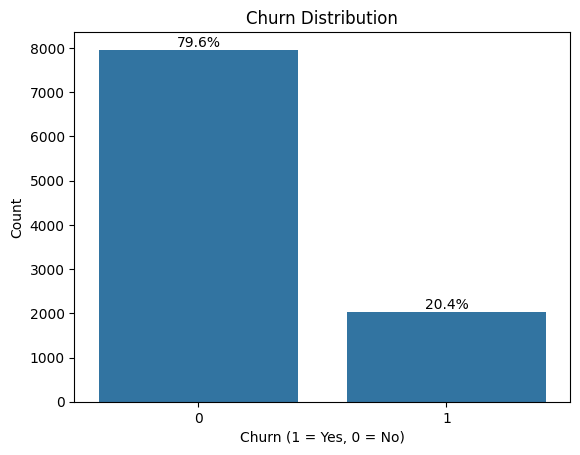

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn (1 = Yes, 0 = No)')
plt.ylabel('Count')

total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()


Age distribution

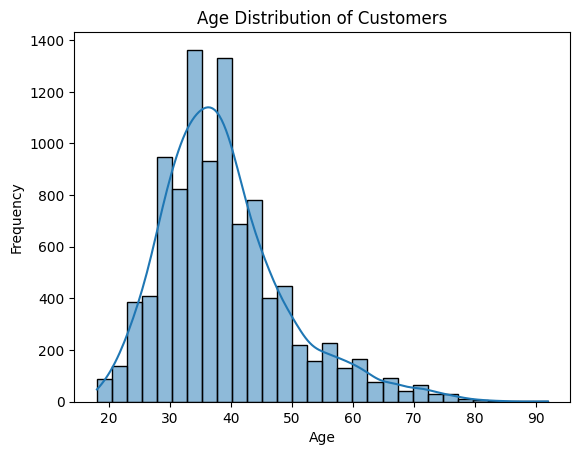

In [ ]:
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [ ]:
older_group = df[df['age'] >= 30]
percent_older = (len(older_group) / len(df)) * 100
print(f"Percentage of customers aged 30 or older: {percent_older:.2f}%")


Percentage of customers aged 30 or older: 83.59%


Balance vs. Churn

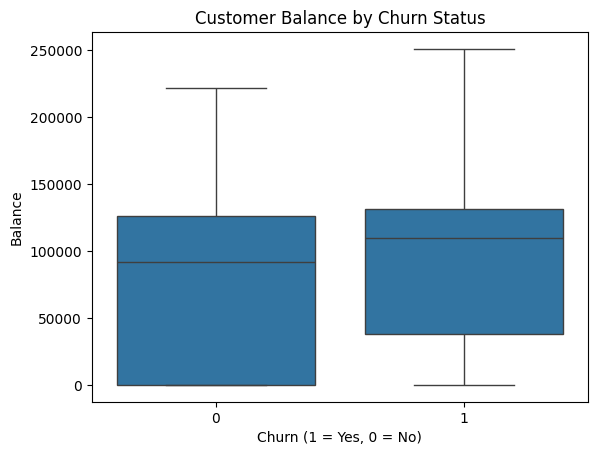

In [ ]:
sns.boxplot(x='churn', y='balance', data=df)
plt.title('Customer Balance by Churn Status')
plt.xlabel('Churn (1 = Yes, 0 = No)')
plt.ylabel('Balance')
plt.show()



Churn By country

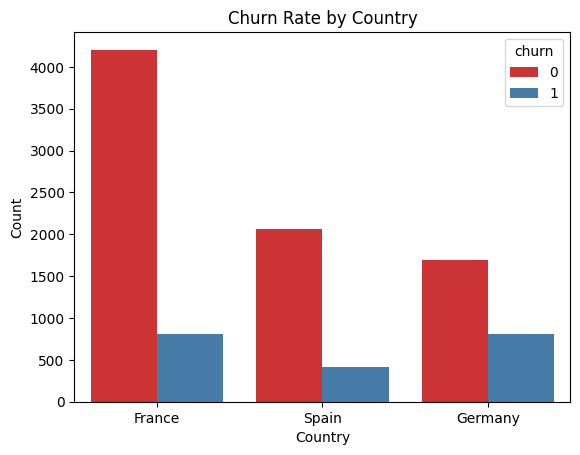

In [ ]:
sns.countplot(x='country', hue='churn', data=df , palette='Set1')
plt.title('Churn Rate by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


Churn By Gender

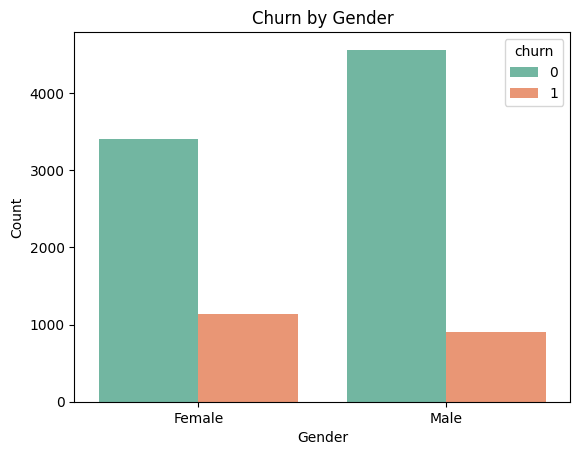

In [ ]:
sns.countplot(x='gender', hue='churn', data=df , palette='Set2')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


Correlation Heatmap

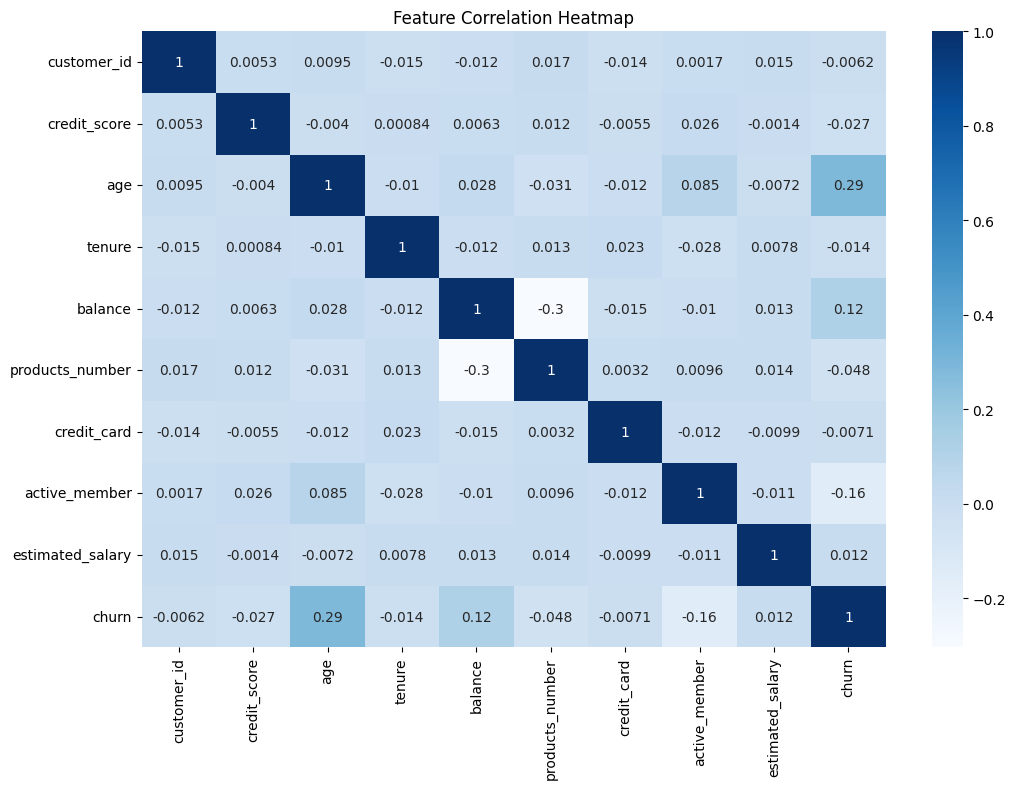

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=['country', 'gender']).corr(), annot=True, cmap='Blues')
plt.title("Feature Correlation Heatmap")
plt.show()